# Лабораторная работа №2
## 1.1 Оценки математического ожидания, дисперсии, медианы

Пусть случайная величина $\xi$ имеет распределение, задаваемое плотностью $f_{\xi}(x) = \Theta^2xe^{-\Theta x}$. Для каждого $\Theta \in \{0.5,2,8\}$:

#### 1. 
(a) Аналитически вычислить математическое ожидание, дисперсию и математическое ожидание квадрата $\xi$. Привести в отчет.<br>
(b) Для $k \in \{2^4, 2^5, \dots, 2^15\}$ построить выборку из $k$ элементов. Для каждой из них посчитать оценки: математического ожидания, дисперсии и квадрата математического ожидания параметра из варианта. Для каждой из выборок и оценок визуализировать это все на графиках (для каждой оценки — свой график), где по вертикальной оси — оценка, а по горизонтальной — $k$, плюс, добавьте горизонтальнуюлинию,отвечающую за аналитически полученную оценку.

#### Решение <br>
Дано: СВ имеет плотность рспределения $f_{\xi}(x) = \Theta^2xe^{-\Theta x}$ - это гамма-распределение.<br> Данное гамма-распределение имеет следующие параметры:<br>
- параметр формы $\alpha = 2 $
- параметр масштаба $\beta = \Theta$

(a) Так как у нас представлено гамма-распределение, то находим математическое ожидание, дисперсию и математическое ожидание квадрата с помощью параметров формы и масштаба.<br>
$$E[\xi]= \frac{\alpha}{\beta} = \frac{2}{\Theta}$$
$$D(\xi) = \frac{\alpha}{\beta^2} = \frac{2}{\Theta^2}$$
$$E[\xi^2] = D(\xi) + E[\xi]^2 = \frac{2}{\Theta^2} + \frac{4}{\Theta^2} = \frac{6}{\Theta^2}$$

Подставляем $\Theta \in \{0.5,2,8\}$:
|$\Theta$|$E[\xi]$|$D(\xi)$|$E[\xi^2]$|
|-------|-----|-------|-------|
|$0.5$|$4$|$8$|$24$|
|$2$|$1$|$\frac{1}{2}$|$\frac{3}{2}$|
|$8$|$\frac{1}{4}$|$\frac{1}{32}$|$\frac{3}{32}$|

(b) 

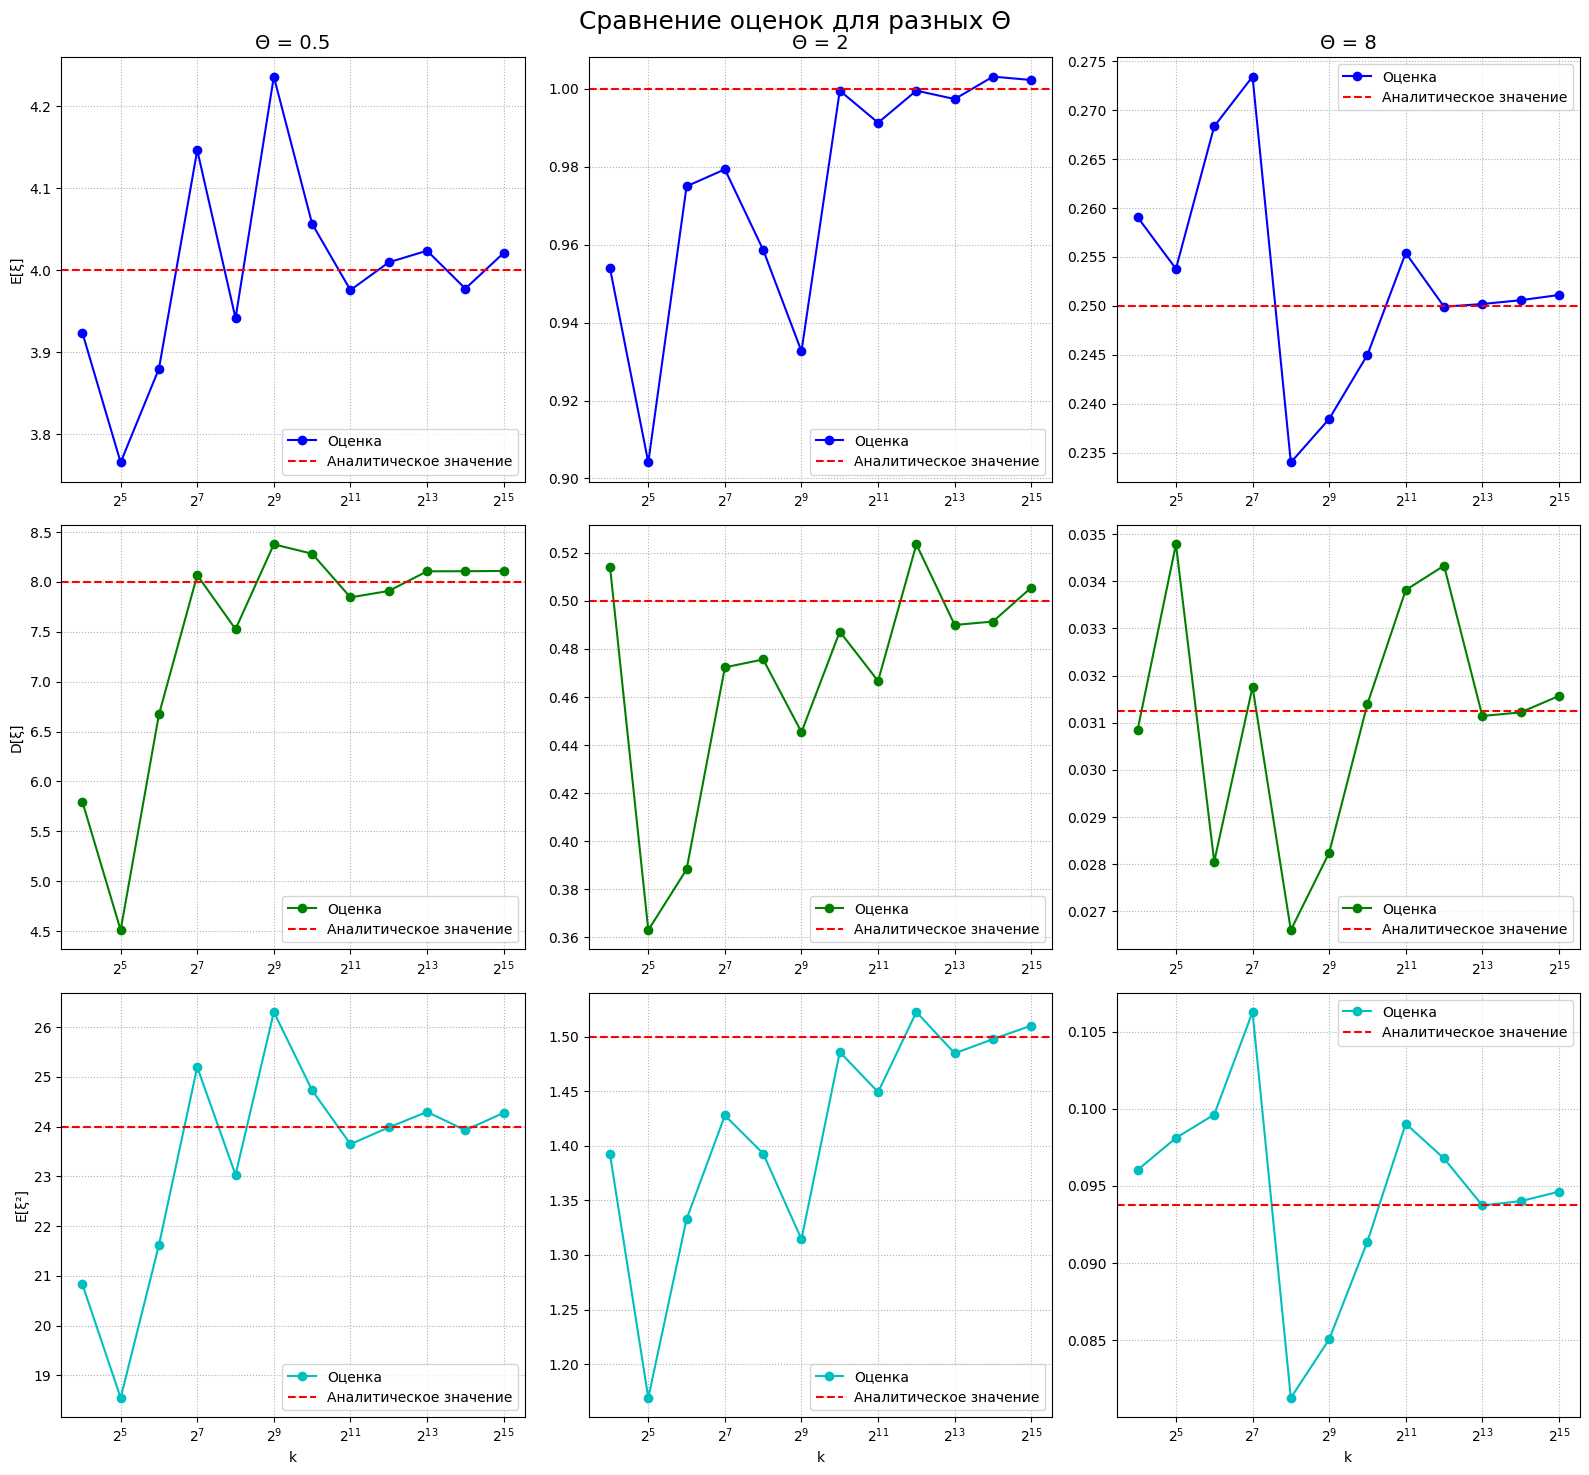

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# записываем значения параметра Theta
thetas = [0.5, 2, 8]

# размеры выборок k = {2^4, ... ,2^15}
ks = 2 ** np.arange(4, 16)

# записываем ранее полученные аналитические значения
true_means = np.array(list(map(lambda theta: 2 / theta, thetas)))
true_vars = np.array(list(map(lambda theta: 2 / (theta ** 2), thetas)))
true_esqs = np.array(list(map(lambda theta: 6 / (theta ** 2), thetas)))

# задаем зерно для воспрлизводимости
np.random.seed(42)

# создаём словари для хранения результатов всех Theta
all_est_means = {}
all_est_vars = {}
all_est_esqs = {}

for Theta in thetas:
    est_means = []
    est_vars = []
    est_esqs = []

    # генерируем выборки разных размеров
    for k in ks:
        sample = np.random.gamma(shape=2, scale=1/Theta, size=k)

        est_means.append(np.mean(sample))
        est_vars.append(np.var(sample, ddof=1)) # несмещённая дисперсия
        est_esqs.append(np.mean(sample**2))

    # сохраняем результаты для текущего Theta
    all_est_means[Theta] = np.array(est_means)
    all_est_vars[Theta] = np.array(est_vars)
    all_est_esqs[Theta] = np.array(est_esqs)

fig, axes = plt.subplots(3, 3, figsize=(16, 15))
fig.suptitle('Сравнение оценок для разных Θ', fontsize=18)

for col, Theta in enumerate(thetas):
    ax = axes[0, col]
    ax.plot(ks, all_est_means[Theta], color = 'b', marker='o', label='Оценка')
    ax.axhline(true_means[col], color = 'r', linestyle='--', label='Аналитическое значение')
    ax.set_xscale('log', base=2)
    ax.set_title(f'Θ = {Theta}', fontsize=14)
    if col == 0:
        ax.set_ylabel('E[ξ]')
    ax.grid(True, linestyle=':')
    ax.legend()

    # --- 2. Var[X] ---
    ax = axes[1, col]
    ax.plot(ks, all_est_vars[Theta], color = 'g', marker='o', label='Оценка')
    ax.axhline(true_vars[col], color = 'r', linestyle='--', label='Аналитическое значение')
    ax.set_xscale('log', base=2)
    if col == 0:
        ax.set_ylabel('D[ξ]')
    ax.grid(True, linestyle=':')
    ax.legend()

    # 
    ax = axes[2, col]
    ax.plot(ks, all_est_esqs[Theta], color = 'c', marker='o', label='Оценка')
    ax.axhline(true_esqs[col], color = 'r', linestyle='--', label='Аналитическое значение')
    ax.set_xscale('log', base=2)
    if col == 0:
        ax.set_ylabel('E[ξ²]')
    ax.set_xlabel('k')
    ax.grid(True, linestyle=':')
    ax.legend()

plt.tight_layout()
plt.show()

- Чем больше k, тем оценки становятся ближе к своим аналитическим значениям. 
- При небольшом значении $\Theta$, значения сильно разбросаны, например, при $\Theta = 0.5$ значения колеблются намного сильнее, чем при больших значениях.

#### 2. Дана плотность распределения случайной величины $\xi$:

$$f_{\xi}^{\lambda, a}(x) = \begin{cases}  \lambda e^{-\lambda(x-a)}, & \quad x \geq a \\ 0, & \quad else \end{cases}
$$ 

Пусть $(λ,a) = (2,2)$ <br>
(a) Аналитически вычислите значение моды, математического ожидания и медианы.<br>
(b) Создайте две выборки: одну довольно большого размера (10000 наблюдений, например), а вторую маленькую (например, 20). Постройте оценки моды, математического ожидания и медианы. <br>
(c) Постройте для первой выборки на одном графике: гистограмму распределения значений из выборки и три вертикальных линии оценок моды, математического ожидания и медианы. Для второй выборки сделайте то же самое. Постройте ещё график рядом для первой выборки, но с функцией распределения плотности и аналитическими значениями мод, математического жидания и медианы. <br>
То же самое, для второй.<br>
(d) Попробуйте поизменять размер выборки и посмотреть на то, например, сходится ли медиана к математическому ожиданию, или нет.<br>

#### Решение <br>
Дано: СВ имеет плотность рспределения 
$$f_{\xi}^{\lambda, a}(x) = \begin{cases} \lambda e^{-\lambda(x-a)}, & \quad x \geq a \\ 0, & \quad else \end{cases}
$$ 
это смещённое экспоненциальное распределение.

(a) Мода - это точка, где плотность достигает максимума: <br>
При $\lambda > 0$ функция плотности будет убывать, так как ее производная равна: $$f'(x) = -\lambda^{2} e^{-\lambda(x-a)}$$
В таком случае максимум будет достигаться при $x = a$, в данном случае $a =2 \implies$ мода равна 2. <br>

Математическое ожидание: <br>
Для смещённого экспоненциального распределения матожидание можно найти следующим способом: $$E[\xi] = a + \frac{1}{\lambda} = 2 + \frac{1}{2} = 2.5$$

Медиана СВ - это такое m, при котором $P(\xi < m) = 0.5 \implies F(m) = 0.5$: 
Для нахождения медианы необходимо решить уравнение $F(x) = 1 - e^{-2(m-2)}$:
$$1 - e^{-2(m-2)} = 0.5$$
$$e^{-2(m-2)} = 0.5$$
$$-2(m-2) = ln(0.5)$$
$$-2(m-2) = -ln2$$
$$m-2 = \frac{ln2}{2}$$
$$m = 2 + \frac{ln2}{2}$$
$$m \approx 2.3466$$

(b) 

In [5]:
import numpy as np

lambda_v = 2   # параметр λ
a = 2         # сдвиг a

# Размеры выборок
n_large = 10000
n_small = 20

# Равномерные выборки
U_large = np.random.uniform(0, 1, n_large)
U_small = np.random.uniform(0, 1, n_small)

# Большая выборка
sample_large = np.random.exponential(scale=1/lambda_v, size=n_large) + a

# Маленькая выборка
sample_small = np.random.exponential(scale=1/lambda_v, size=n_small) + a

# Мода (для экспоненциального распределения мода = a)
mode_large = a
mode_small = a

# Среднее
mean_large = np.mean(sample_large)
mean_small = np.mean(sample_small)

# Медиана
median_large = np.median(sample_large)
median_small = np.median(sample_small)

print("Большая выборка:")
print("Среднее:", mean_large)
print("Медиана:", median_large)
print("Мода:", mode_large)

print("\nМаленькая выборка:")
print("Среднее:", mean_small)
print("Медиана:", median_small)
print("Мода:", mode_small)

Большая выборка:
Среднее: 2.506819536363767
Медиана: 2.3513099728870204
Мода: 2

Маленькая выборка:
Среднее: 2.3230783556350825
Медиана: 2.1934162709637763
Мода: 2


In [21]:
true_mode = 2
true_mean = 2.5
true_median = 2 + (np.log(2) / 2)

diff_small_mean = true_mean - mean_small
diff_small_median = true_median - median_small

diff_large_mean = true_mean - mean_large
diff_large_median = true_median - median_large

print("Разница с аналитическим решением:")
print("Большая выборка:")
print("Среднее:", diff_large_mean)
print("Медиана:", diff_large_median)

print("\nМаленькая выборка:")
print("Среднее:", diff_small_mean)
print("Медиана:", diff_small_median)

Разница с аналитическим решением:
Большая выборка:
Среднее: -0.006819536363766865
Медиана: -0.004736382607047673

Маленькая выборка:
Среднее: 0.17692164436491753
Медиана: 0.15315731931619636


(c) Графики

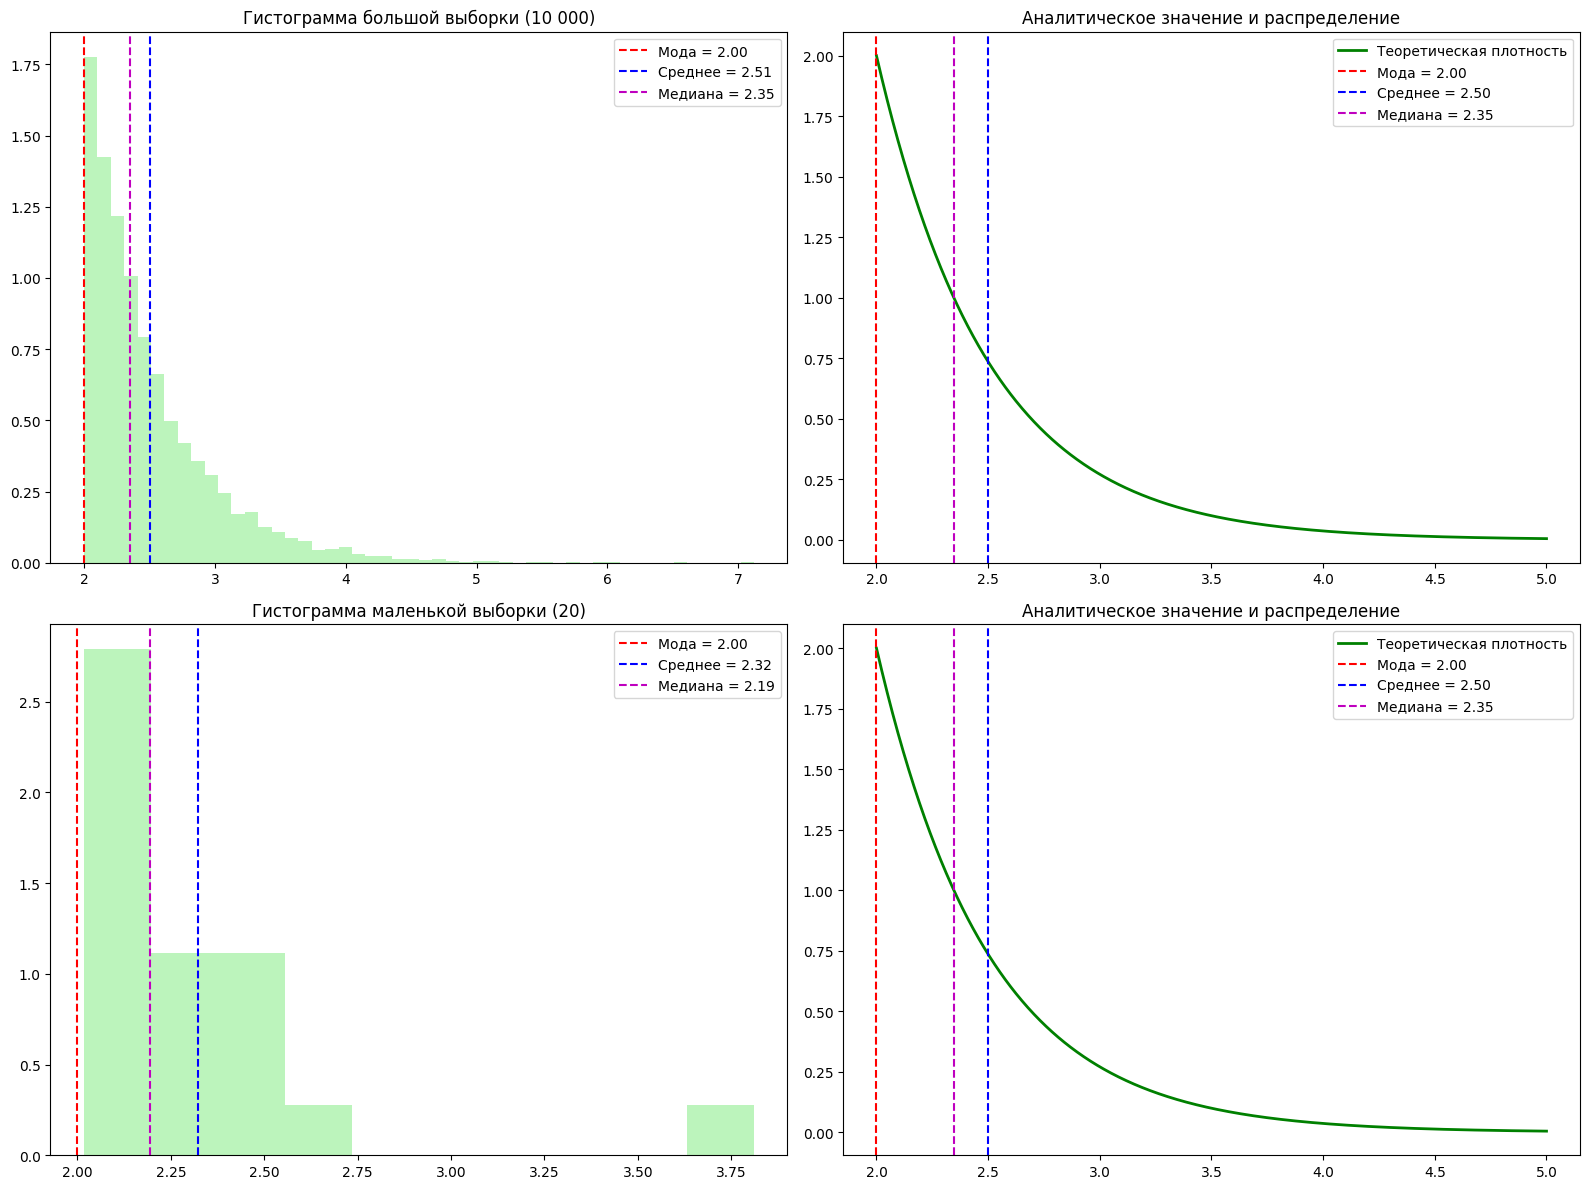

In [23]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Гистограмма большой выборки
axes[0,0].hist(sample_large, bins=50, density=True, alpha=0.6, color='lightgreen')
axes[0,0].axvline(mode_large, color='r', linestyle='--', label=f'Мода = {mode_large:.2f}')
axes[0,0].axvline(mean_large, color='b', linestyle='--', label= f'Среднее = {mean_large:.2f}')
axes[0,0].axvline(median_large, color='m', linestyle='--', label= f'Медиана = {median_large:.2f}')
axes[0,0].set_title('Гистограмма большой выборки (10 000)')
axes[0,0].legend()

# Гистограмма маленькой выборки
axes[1,0].hist(sample_small, bins=10, density=True, alpha=0.6, color='lightgreen')
axes[1,0].axvline(mode_small, color='r', linestyle='--', label=f'Мода = {mode_small:.2f}')
axes[1,0].axvline(mean_small, color='b', linestyle='--', label=f'Среднее = {mean_small:.2f}')
axes[1,0].axvline(median_small, color='m', linestyle='--', label=f'Медиана = {median_small:.2f}')
axes[1,0].set_title('Гистограмма маленькой выборки (20)')
axes[1,0].legend()

# Аналитическое значение и распределение
x_vals = np.linspace(a, 5, 1000)
an_vals = lambda_v * np.exp(-lambda_v * (x_vals - a)) * (x_vals >= a)
axes[0,1].plot(x_vals, an_vals, color='g', lw=2, linestyle='-', label='Теоретическая плотность')
axes[0,1].axvline(true_mode, color='r', linestyle='--', label=f'Мода = {true_mode:.2f}')
axes[0,1].axvline(true_mean, color='b', linestyle='--', label= f'Среднее = {true_mean:.2f}')
axes[0,1].axvline(true_median, color='m', linestyle='--', label= f'Медиана = {true_median:.2f}')
axes[0,1].set_title('Аналитическое значение и распределение')
axes[0,1].legend()

axes[1,1].plot(x_vals, an_vals, color='g', lw=2, linestyle='-', label='Теоретическая плотность')
axes[1,1].axvline(true_mode, color='r', linestyle='--', label=f'Мода = {true_mode:.2f}')
axes[1,1].axvline(true_mean, color='b', linestyle='--', label= f'Среднее = {true_mean:.2f}')
axes[1,1].axvline(true_median, color='m', linestyle='--', label= f'Медиана = {true_median:.2f}')
axes[1,1].set_title('Аналитическое значение и распределение')
axes[1,1].legend()

plt.tight_layout()
plt.show()

(d) Сходимости выборочных значений с теоритическими

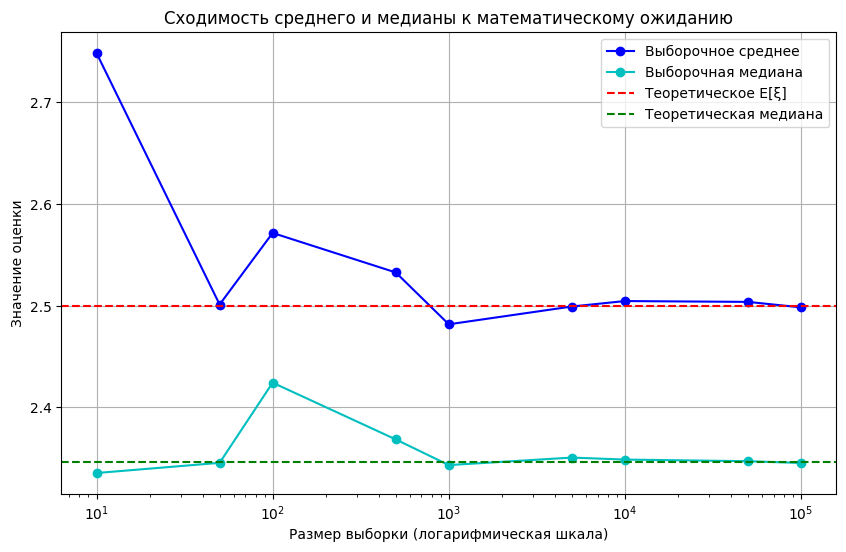

In [27]:
# Размеры выборок для эксперимента
sample_sizes = [10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000]

# Списки для хранения результатов
means_samples = []
medians_samples  = []

for n in sample_sizes:
    sample = np.random.exponential(scale=1/lambda_v, size=n) + a
    means_samples.append(np.mean(sample))
    medians_samples.append(np.median(sample))

plt.figure(figsize=(10,6))
plt.plot(sample_sizes, means_samples, color='b', marker='o', label='Выборочное среднее')
plt.plot(sample_sizes, medians_samples, color='c', marker='o', label='Выборочная медиана')
plt.axhline(true_mean, color='r', linestyle='--', label='Теоретическое E[ξ]')
plt.axhline(true_median, color='g', linestyle='--', label='Теоретическая медиана')
plt.xscale('log')
plt.xlabel('Размер выборки (логарифмическая шкала)')
plt.ylabel('Значение оценки')
plt.title('Сходимость среднего и медианы к математическому ожиданию')
plt.legend()
plt.grid(True)
plt.show()

Чем больше выборка, тем больше значение выборочного среднего/медианы сходится к своему теоритическому значению. Однако даже при большоей выборке выборочная медиана не сходится к теоретическому матожиданию. 

## 1.2 Моделирование совместного распределения двух СВ

Пусть совместное распределение двух случайных величин задано таблицей

|$\xi \backslash \eta$|$1$|$2$|$3$|$\dots$|
|---------------------|-|-|-|-------|
|$-1$|$\frac{2}{5} \cdot \frac{1}{2^1}$|$\frac{2}{5} \cdot \frac{1}{2^2}$|$\frac{2}{5} \cdot \frac{1}{2^3}$|$\dots$|
|$0$|$\frac{1}{5} \cdot \frac{1}{2^1}$|$\frac{1}{5} \cdot \frac{1}{2^2}$|$\frac{1}{5} \cdot \frac{1}{2^3}$|$\dots$|
|$1$|$\frac{2}{5} \cdot \frac{1}{2^1}$|$\frac{2}{5} \cdot \frac{1}{2^2}$|$\frac{2}{5} \cdot \frac{1}{2^3}$|$\dots$|

где $\eta$ принимает все значения из $N$. Вычислить корреляционую матрицу аналитически и приближенно (на основе моделирования).

#### Решение <br>

Дано:

$$P(\xi = x, \eta = z)= \begin{cases} \frac{2}{5} \cdot \frac{1}{2^z}, & \quad x = 1, z \in N \\ \frac{1}{5} \cdot \frac{1}{2^z}, & \quad x = 0, z \in N\\ \frac{2}{5} \cdot \frac{1}{2^z}, & \quad x = -1, z \in N\end{cases}
$$ 

Маргинальное распределение: <br>
Для $\xi$:<br>
$$\xi(-1) = \frac{2}{5} \cdot 1 = \frac{2}{5}$$
$$\xi(0) = \frac{1}{5} \cdot 1 = \frac{1}{5}$$
$$\xi(1) = \frac{2}{5} \cdot 1 = \frac{2}{5}$$

Для $\eta$:<br>
$$\eta(z) = \frac{2}{5} \cdot \frac{1}{2^z} + \frac{1}{5} \cdot \frac{1}{2^z} + \frac{2}{5} \cdot \frac{1}{2^z} = \frac{5}{5} \cdot \frac{1}{2^z} = \frac{1}{2^z}, z \in N$$

Получается $P(\eta = z) = \frac{1}{2^z}, z \in N$ - геометрическая прогрессия. 

Матожидание: <br>
$$E[\xi] = -1 \cdot \frac{2}{5} + 0 \cdot \frac{1}{5} + 1 \cdot \frac{2}{5} = 0$$
$$E[\eta] = \displaystyle\sum_{z=1}^{\infty}z \cdot P(\eta = z) = \displaystyle\sum_{z=1}^{\infty}z \cdot \frac{1}{2^z} = 2$$

Дисперсия: <br>
Для $\xi$: $$D(\xi) = E[\xi^2] - (E[\xi])^2 $$
$$E[\xi^2] = (-1)^2 \cdot \frac{2}{5} + 0^2 \cdot \frac{1}{5} + 1^2 \cdot \frac{2}{5} = \frac{4}{5}$$
$$D(\xi)= E[\xi^2] - (E[\xi])^2 = \frac{4}{5} - 0 = \frac{4}{5}$$
 
Для $\eta$: $$D(\eta) = E[\eta^2] - (E[\eta])^2 $$
$$E[\eta^2] = \displaystyle\sum_{z=1}^{\infty}z^2 \cdot \frac{1}{2^z} = 6$$
$$D(\eta)= E[\eta^2] - (E[\eta])^2 = 6 - 4 = 2$$

Ковариация и корреляция: <br>
$$Cov(\xi, \eta) = E[\xi \eta] - E[\xi]E[\eta]$$
$$E[\xi \eta] = \displaystyle\sum_{x, z}xzP(\xi = z, \eta = z) = \displaystyle\sum_{z}[-z\cdot \frac{2}{5} \cdot \frac{1}{2^z} + 0 + z \cdot \frac{2}{5} \cdot \frac{1}{2^z}] = \displaystyle\sum_{z}[ -\frac{2z}{5\cdot 2^z} + \frac{2z}{5\cdot 2^z}] = 0$$

$$Cov(\xi, \eta) = E[\xi \eta] - E[\xi]E[\eta] = 0 - 0 \cdot 2 = 0$$

Корреляционная матрица: <br>
$$\rho(\xi, \eta) = \frac{Cov(\xi, \eta)}{\sqrt{D\xi}\sqrt{D\eta}} = \frac{0}{\sqrt{0.8 \cdot 0}} = 0 $$

$$R = \begin{pmatrix} 
    1  & \rho(\xi, \eta) \\
    \rho(\xi, \eta) & 1
\end{pmatrix} = \begin{pmatrix} 
    1  & 0\\
    0 & 1
\end{pmatrix}$$

In [36]:
import numpy as np

# задаем параметры
n = 100000
np.random.seed(42)

# генерация η - геометрическая прогрессия (z=1,2,...)
eta = np.random.geometric(p=0.5, size=n)

# генерация ξ по условным вероятностям
xi_probs = [-1, 0, 1]
xi_weights = [2/5, 1/5, 2/5]
xi = np.random.choice(xi_probs, size=n, p=xi_weights)

# Выборочные оценки
mean_xi = np.mean(xi)
mean_eta = np.mean(eta)
var_xi = np.var(xi, ddof=1)
var_eta = np.var(eta, ddof=1)
cov = np.cov(xi, eta , ddof=1)[0,1]
corr = np.corrcoef(xi, eta)[0,1]
corr_m = np.corrcoef(xi, eta)

print("Моделирование данных:")
print("Среднее ξ:", mean_xi)
print("Среднее η :", mean_large)
print("Дисперсия ξ:", var_xi)
print("Дисперсия η :", var_eta)
print("Ковариация:", cov)
print("Корреляция:", corr)

print("\nКорреляционная матрица:") 
print(corr_m)

Моделирование данных:
Среднее ξ: 0.00324
Среднее η : 2.506819536363767
Дисперсия ξ: 0.8001375037750377
Дисперсия η : 1.9696554901549015
Ковариация: 0.0028459692596926123
Корреляция: 0.0022670064504234227

Корреляционная матрица:
[[1.         0.00226701]
 [0.00226701 1.        ]]
